In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Step 1: Load Data
df = pd.read_csv("/content/drive/MyDrive/HR.csv")
df.columns = df.columns.str.strip()  # remove any whitespace from column names
print("Columns:", df.columns.tolist())

Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [64]:
# Step 2: Identify Target Column
# Check for 'left', 'Left', or any similar column as target
if 'left' in df.columns:
    target_col = 'left'
elif 'Left' in df.columns:
    target_col = 'Left'
else:
    raise ValueError("No attrition-related column found (e.g., 'left')")


In [65]:
# Step 3: Basic Info
print("Shape:", df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Shape: (14999, 10)
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000  

In [66]:
# Step 4: Value Counts of Target
print(f"\nTarget '{target_col}' distribution:\n", df[target_col].value_counts())

# Step 5: Categorical Columns Overview
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts())


Target 'left' distribution:
 left
0    11428
1     3571
Name: count, dtype: int64

sales value counts:
 sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

salary value counts:
 salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


/tmp/ipython-input-67-383918525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='pastel')


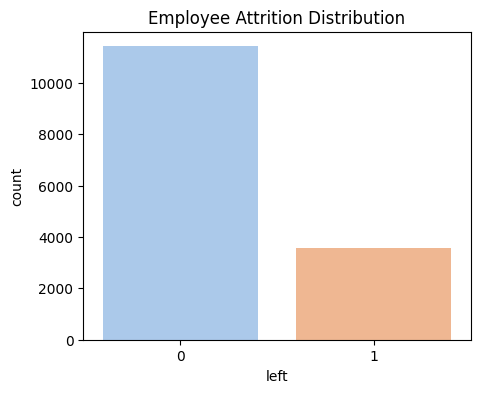

In [67]:
# Step 6: Visual EDA

# Attrition count
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=target_col, palette='pastel')
plt.title('Employee Attrition Distribution')
plt.show()


In [68]:
# One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

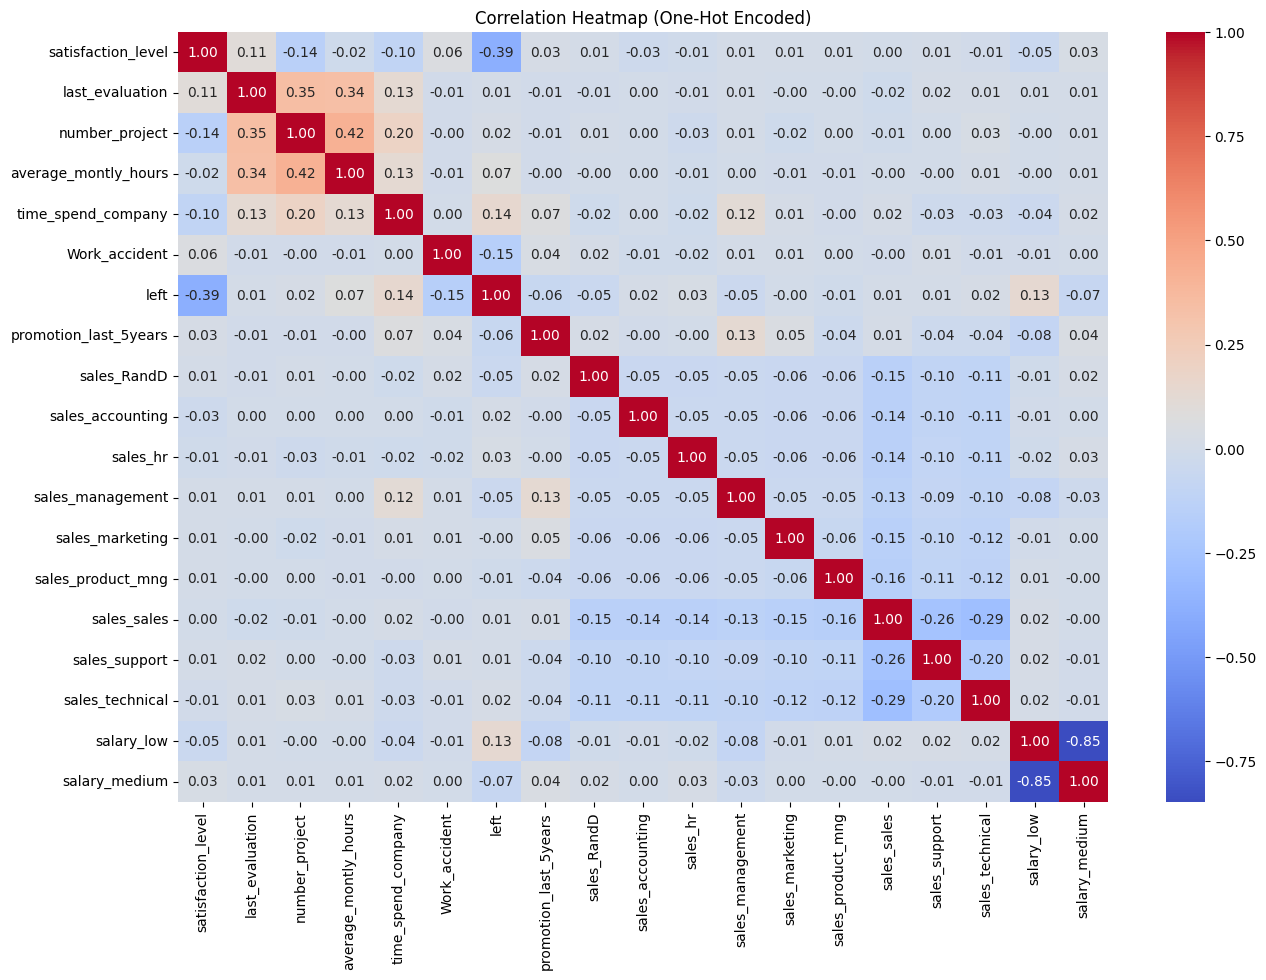

In [69]:
# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (One-Hot Encoded)')
plt.show()

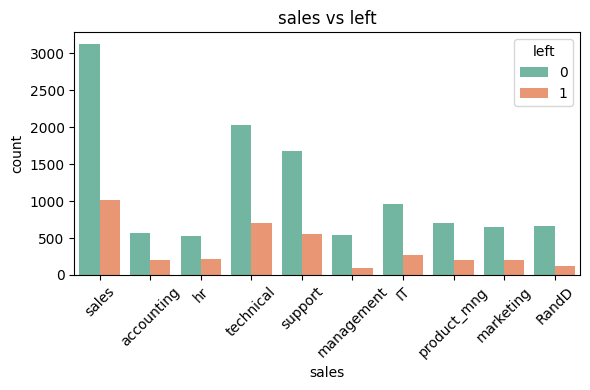

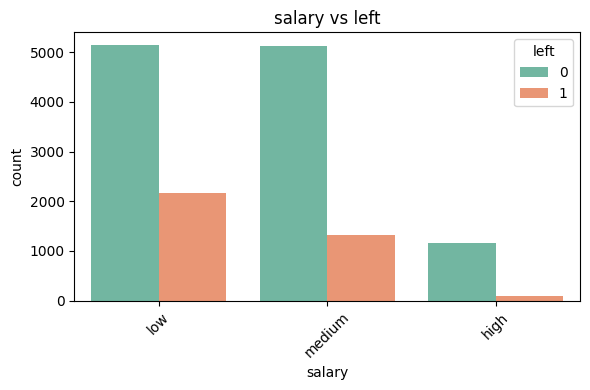

In [70]:
# Attrition vs categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=target_col, palette='Set2')
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


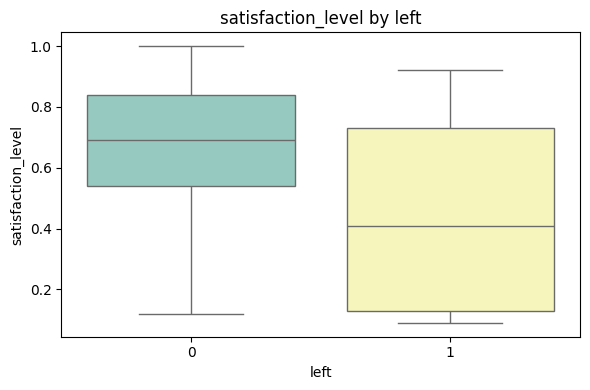

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


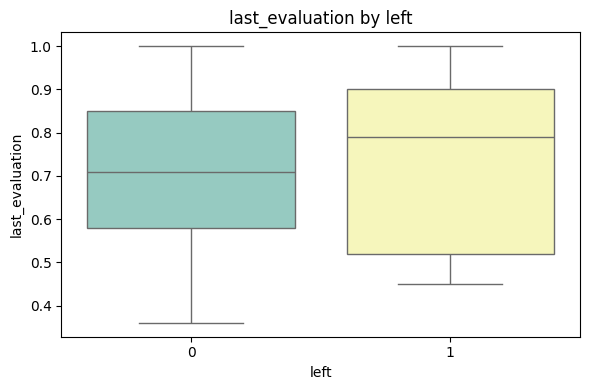

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


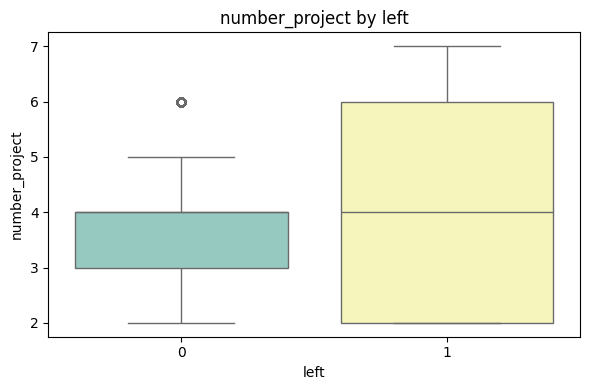

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


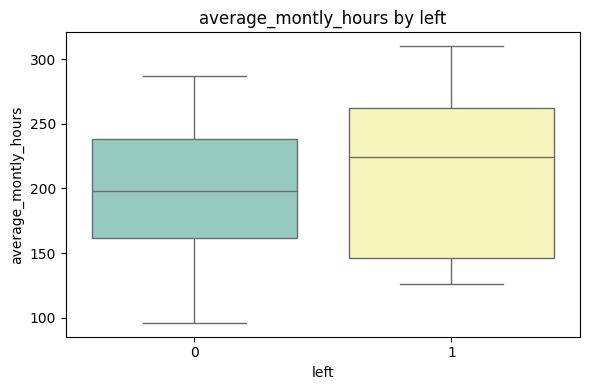

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


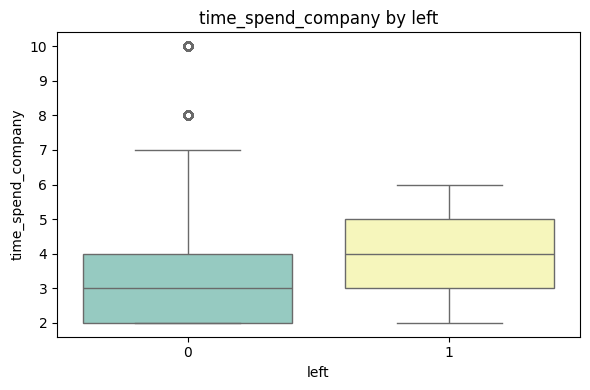

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


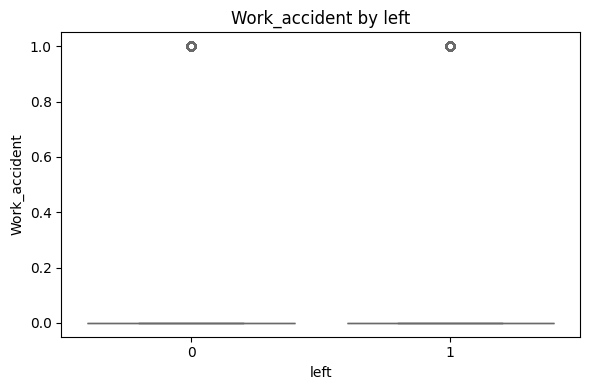

/tmp/ipython-input-72-4013735973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Set3')


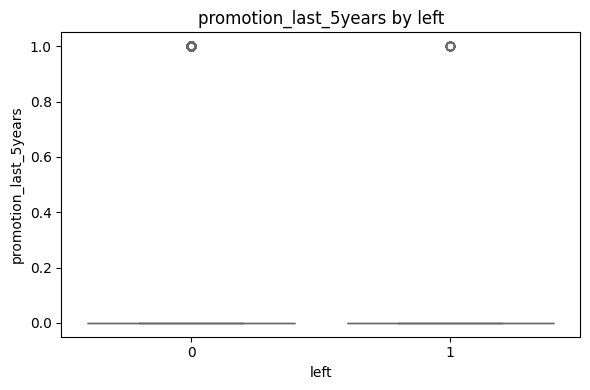

In [72]:
# Attrition vs numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=target_col, y=col, palette='Set3')
        plt.title(f'{col} by {target_col}')
        plt.tight_layout()
        plt.show()

In [73]:
# Step 7: Preprocessing (Label Encoding)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [74]:

# Step 8: Split Data
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Step 9: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Step 10: Evaluate
y_pred = rf.predict(X_test)
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.9883333333333333
Confusion Matrix:
 [[2285    9]
 [  26  680]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



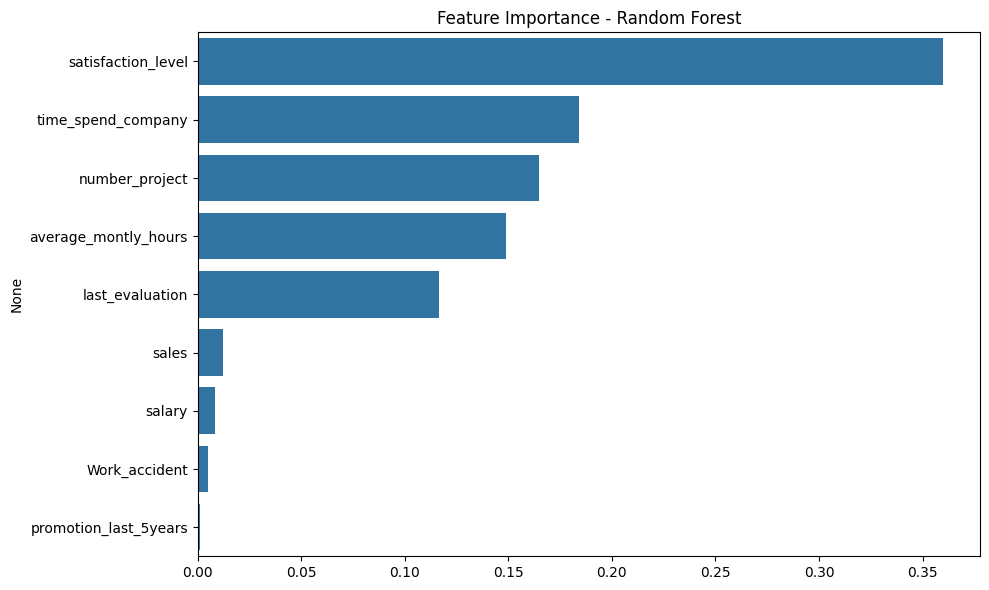

In [77]:
# Step 11: Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()